# pebblo

### Overview

Pebblo enables developers to safely load data and promote their Gen AI app to deployment without worrying about the organization’s compliance and security requirements. The project identifies semantic topics and entities found in the loaded data and summarizes them on the UI or a PDF report.

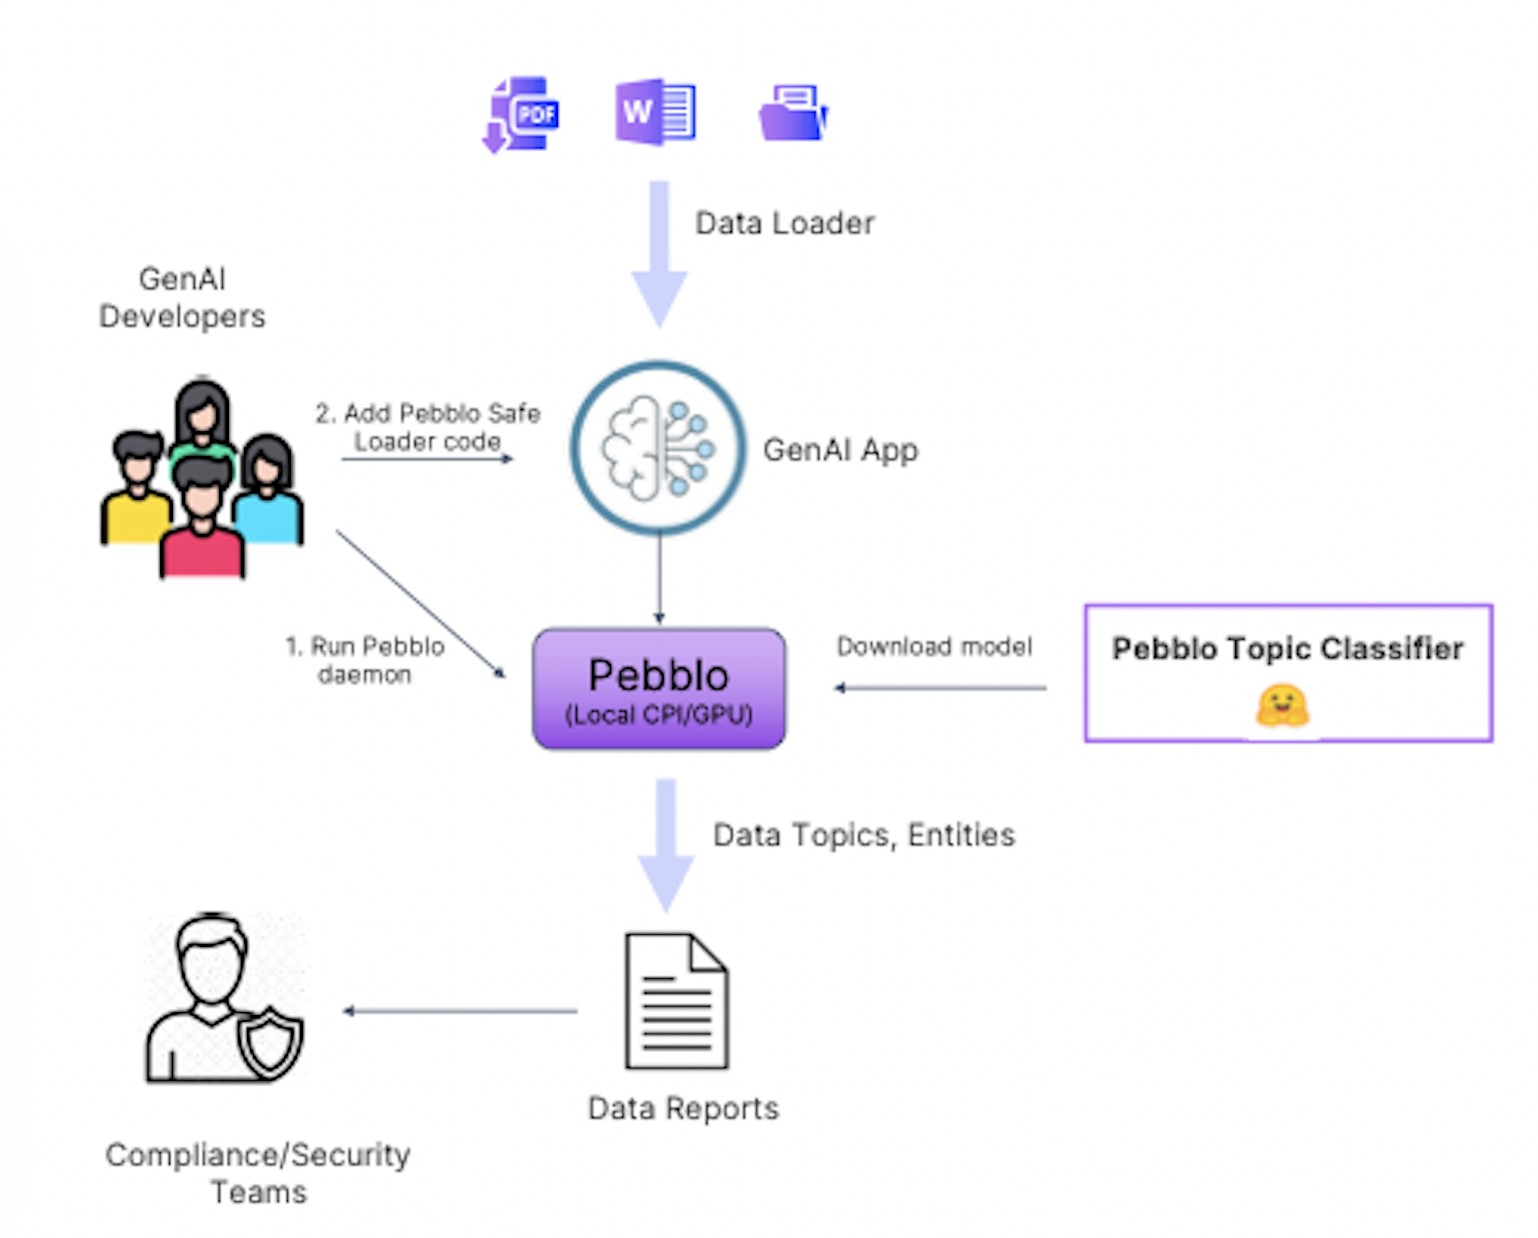

### Benefits

1. Identify semantic topics and entities in your data loaded in RAG applications
1. Accelerate time-to-production by effortlessly meeting your organization’s data compliance requirements
1. Mitigate security risks arising from data poisoning and emerging threats.
1. Comply with regulations such as the EU AI Act with custom reports and data records
1. Support for a wide range of Gen AI development frameworks and data loaders

### Safe DocumentLoader for Langchain

Pebblo has two components.

1. Pebblo Safe DocumentLoader for Langchain
1. Pebblo Daemon

This document describes how to augment your existing Langchain DocumentLoader with Pebblo Safe DocumentLoader to get deep data visibility on the types of Topics and Entities ingested into the Gen-AI Langchain application. For details on `Pebblo Daemon` see this [pebblo daemon](https://daxa-ai.github.io/pebblo-docs/daemon.html) document.

Pebblo Safeloader enables safe data ingestion for _any_ Langchain `DocumentLoader`. This is done by wrapping the document loader call with `Pebblo Safe DocumentLoader`.

#### How to Pebblo enable Document Loading?

Assume a Langchain RAG application snippet using `CSVLoader` to read a CSV document for inference.

Here is the snippet of Document loading using `CSVLoader`.

In [4]:
from langchain.document_loaders.csv_loader import CSVLoader

loader = CSVLoader("data/sens_data.csv")
documents = loader.load()
print(documents)

[Document(page_content='Name: xGelEeIfPW\nEmail: jDhHvGhCQM@IlJqV.com\nSSN: 265923644\nAddress: BLQvsSCvuqiMcZyMScwJ\nCC Expiry: 11/2025\nCredit Card Number: 6267494999707042\nCC Security Code: 423\nIPv4: 7.178.156.177\nIPv6: 9b37:ec97:c3d0:d7ab:cda8:539f:9cc1:67fa\nPhone: 2690137480', metadata={'source': '../../../../../data/sens_data.csv', 'row': 0})]


The Pebblo SafeLoader can be enabled with few lines of code change to the above snippet.

In [7]:
from langchain.document_loaders.csv_loader import CSVLoader
from langchain_community.document_loaders import PebbloSafeLoader

loader = PebbloSafeLoader(
    CSVLoader("data/sens_data.csv"),
    app_id="RAG app 1",  # App name (Mandatory)
    owner="Joe Smith",  # Owner (Optional)
    description="Support productivity RAG application",  # Description (Optional)
)
documents = loader.load()
print(documents)

Unable to reach pebblo server.


[Document(page_content='Name: xGelEeIfPW\nEmail: jDhHvGhCQM@IlJqV.com\nSSN: 265923644\nAddress: BLQvsSCvuqiMcZyMScwJ\nCC Expiry: 11/2025\nCredit Card Number: 6267494999707042\nCC Security Code: 423\nIPv4: 7.178.156.177\nIPv6: 9b37:ec97:c3d0:d7ab:cda8:539f:9cc1:67fa\nPhone: 2690137480', metadata={'source': '../../../../../data/sens_data.csv', 'row': 0})]


## Pebblo daemon Installation

### Pre-requisites

#### Mac OSX

`brew install pango`

#### Linux (debian/ubuntu)

`sudo apt-get install libpango-1.0-0 libpangoft2-1.0-0`

### Pebblo Daemon

`pip install pebblo`

### Run Pebblo daemon

`pebblo`

Pebblo daemon now listens to localhost:8000 to accept Gen-AI application document snippets for inspection and reporting.

## Pebblo Data Reports

Pebblo Data Reports provides an in-depth visibilty into the document ingested into Gen-AI RAG application during every load.

This document describes the information produced in the Data Report.

### Report Summary

Report Summary provides the following details:

1. **Findings**: Total number of Topics and Entities found across all the snippets loaded in this specific load run.
1. **Files with Findings**: The number of files that has one or more `Findings` over the total number of files used in this document load. This field indicates the number of files that need to be inspected to remediate any potentially text that needs to be removed and/or cleaned for Gen-AI inference.
1. **Number of Data Source**: The number of data sources used to load documents into the Gen-AI RAG application. For e.g. this field will be two if a RAG application loads data from two different directories or two different AWS S3 buckets.

#### Top Files with Most Findings

This table indicates the top files that had the most findings. Typically these files are the most _affending_ ones that needs immediate attention and best ROI for data cleansing and remediation.

#### Load History

This table provides the history of findings and path to the reports for the previous loads of the same RAG application.

#### Instance Details

This section provide a quick glance of where the RAG application is physically running like in a Laptop (Mac OSX) or Linux VM and related properties like IP address, local filesystem path and Python version.

#### Data Source Findings Table

This table provides a summary of all the different Topics and Entities found across all the files that got ingested usind `Pebblo SafeLoader` enabled Document Loaders.

#### Snippets

This sections provides the actual text inspected by the `Pebblo Daemon` using the `Pebblo Topic Classifier` and `Pebblo Entity Classifier`. This will be useful to quickly inspect and remediate text that should not be ingested into the Gen-AI RAG application. Each snippet shows the exact file the snippet is loaded from easy remediation.